In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
def generar_dataset_cervezas(n_por_tipo=20, random_state=None):
    """
    Genera un dataset sintético de cervezas con dos características numéricas.
    Cada tipo de cerveza tiene un rango distinto para ambas características.
    
    Parámetros:
        n_por_tipo (int): cantidad de muestras por tipo de cerveza
        random_state (int | None): semilla para reproducibilidad
    
    Retorna:
        X (np.ndarray): matriz de características (shape: (4*n_por_tipo, 2))
        y (np.ndarray): etiquetas (0=IPA, 1=Scottish, 2=Stout, 3=Lager)
        labels (list[str]): nombres de las clases
    """
    if random_state is not None:
        np.random.seed(random_state)
    
    # Rangos de ejemplo para cada tipo (características imaginarias: amargor y color)
    rangos = {
        "IPA":      ((5, 10), (35, 55)),
        "Scottish": ((9, 17), (15, 30)),
        "Stout":    ((28, 40), (30, 50)),
        "Lager":    ((2, 7), (8, 25))
    }
    
    X = []
    y = []
    labels = list(rangos.keys())
    
    for i, tipo in enumerate(labels):
        rango_1, rango_2 = rangos[tipo]
        datos_tipo = np.column_stack((
            np.random.uniform(*rango_1, size=n_por_tipo),
            np.random.uniform(*rango_2, size=n_por_tipo)
        ))
        X.append(datos_tipo)
        y.append(np.full(n_por_tipo, i))
    
    X = np.vstack(X)
    y = np.concatenate(y)
    return X, y, np.array(labels)

#Datos
X, y, labels = generar_dataset_cervezas(100, random_state=42)

In [3]:
# División
X_train, X_val, y_train, y_val = train_test_split(X, y, shuffle=True, test_size=0.3, random_state=42)

# Escalado
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [4]:
# Modelos
base_clf = LogisticRegression(max_iter=50, random_state=42)
ovr_clf = OneVsRestClassifier(base_clf).fit(X_train_scaled, y_train)
ovo_clf = OneVsOneClassifier(base_clf).fit(X_train_scaled, y_train)
soft_max_clf = LogisticRegression(max_iter=50, multi_class='multinomial', random_state=42).fit(X_train_scaled, y_train)

# Predicciones
y_pred_ovr = ovr_clf.predict(X_val_scaled)
y_pred_ovo = ovo_clf.predict(X_val_scaled)
y_pred_soft_max = soft_max_clf.predict(X_val_scaled)

/home/valentino/Documentos/UNRC/Inteligencia-Artificial/environment/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [5]:
# Matrices de confusión
cm_ovr = confusion_matrix(y_val, y_pred_ovr)
cm_ovo = confusion_matrix(y_val, y_pred_ovo)
cm_soft = confusion_matrix(y_val, y_pred_soft_max)

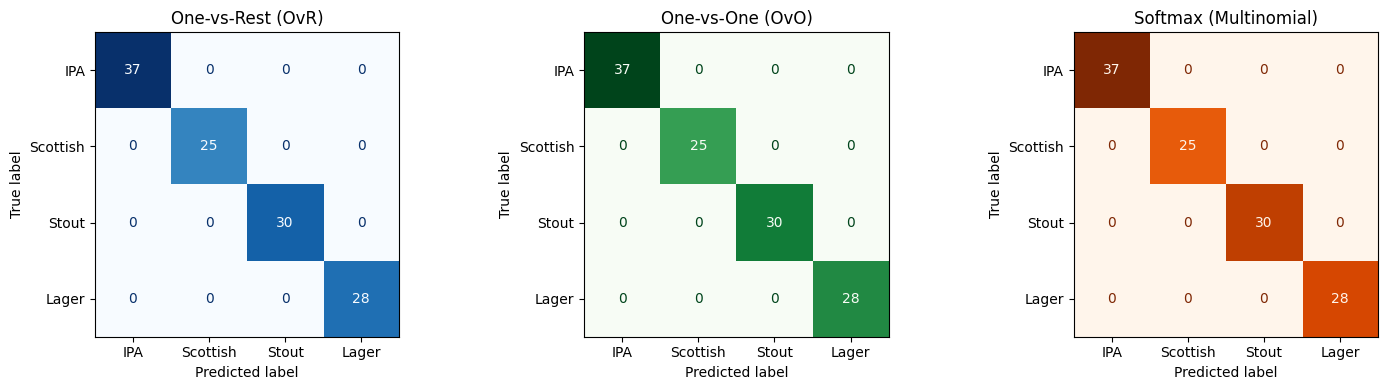

In [6]:
# Gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

disp_ovr = ConfusionMatrixDisplay(cm_ovr, display_labels=labels)
disp_ovr.plot(ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title("One-vs-Rest (OvR)")

disp_ovo = ConfusionMatrixDisplay(cm_ovo, display_labels=labels)
disp_ovo.plot(ax=axes[1], cmap='Greens', colorbar=False)
axes[1].set_title("One-vs-One (OvO)")

disp_soft = ConfusionMatrixDisplay(cm_soft, display_labels=labels)
disp_soft.plot(ax=axes[2], cmap='Oranges', colorbar=False)
axes[2].set_title("Softmax (Multinomial)")

plt.tight_layout()
plt.show()